In [1]:
pwd

u'C:\\Users\\Kevin'

In [2]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [4]:
for num, message in enumerate(messages[:10]):
    print(num,message)
    print('\n')

(0, 'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')


(1, 'ham\tOk lar... Joking wif u oni...')


(2, "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")


(3, 'ham\tU dun say so early hor... U c already then say...')


(4, "ham\tNah I don't think he goes to usf, he lives around here though")


(5, "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, \xc2\xa31.50 to rcv")


(6, 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.')


(7, "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune")


(8, 'spam\tWINNER!! As a valued network customer you have been selected to receive

In [5]:
import pandas

In [6]:
messages = pandas.read_csv('SMSSpamCollection',sep='\t',names=['labels','message'])

In [7]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
labels     5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [11]:
messages.groupby('labels').describe()

message
labels                                                          
ham    count                                                4825
       unique                                               4516
       top                                Sorry, I'll call later
       freq                                                   30
spam   count                                                 747
       unique                                                653
       top     Please call our customer service representativ...
       freq                                                    4

In [13]:
messages['length'] = messages['message'].apply(len)
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

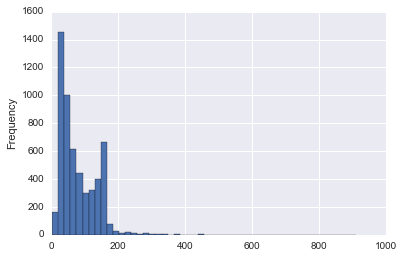

In [17]:
messages['length'].plot(bins=50,kind='hist')

In [22]:
messages['length'].describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [26]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000106060F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010732D30>], dtype=object)

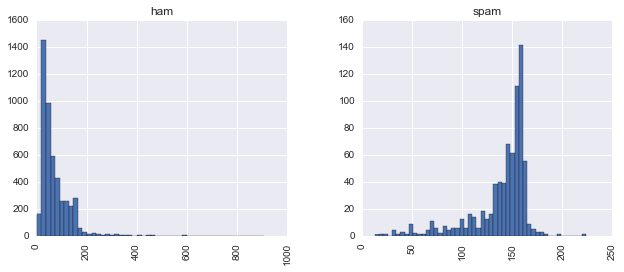

In [36]:
messages.hist(column='length', by='labels', bins=50,figsize=(10,4))

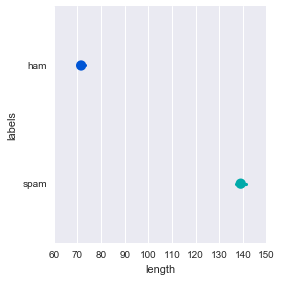

In [42]:
sns.factorplot('length','labels',data=messages,palette='winter')

In [43]:
import string

In [44]:
mess = 'Sample message! Notice: it has punctuation'

In [45]:
nopunc = [char for char in mess if char not in string.punctuation]

In [47]:
nopunc = ''.join(nopunc)

In [48]:
nopunc

'Sample message Notice it has punctuation'

In [49]:
from nltk.corpus import stopwords

In [50]:
stopwords.words('english')[0:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your']

In [51]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [52]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [53]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [57]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [58]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [59]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [60]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
bow_transformer = CountVectorizer(analyzer=text_process)

In [66]:
bow_transformer.fit(messages['message'])

C:\Users\Kevin\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


CountVectorizer(analyzer=<function text_process at 0x0000000012E9DC88>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None,
        vocabulary=None)

In [67]:
message4 = messages['message'][3]

In [68]:
print(message4)

U dun say so early hor... U c already then say...


In [69]:
bow4 = bow_transformer.transform([message4])

In [70]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [73]:
print(bow_transformer.get_feature_names()[6222])

early


In [74]:
messages_bow = bow_transformer.transform(messages['message'])

C:\Users\Kevin\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [75]:
print 'Shape of Sparse Matrix: ', messages_bow.shape
print 'Amount of Non-Zero occurences: ', messages_bow.nnz
print 'sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


In [76]:
from sklearn.feature_extraction.text import TfidfTransformer

In [77]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [78]:
tfidf4 = tfidf_transformer.transform(bow4)

In [80]:
print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [81]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

3.28005242674


In [82]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [83]:
print(messages_tfidf.shape)

(5572, 11425)


In [84]:
from sklearn.naive_bayes import MultinomialNB

In [85]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['labels'])

In [86]:
print('Predicted: ', spam_detect_model.predict(tfidf4)[0])
print('Expected: ', messages['labels'][3])

('Predicted: ', 'ham')
('Expected: ', 'ham')


In [88]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


In [89]:
from sklearn.metrics import classification_report
print(classification_report(messages['labels'],all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [91]:
from sklearn.cross_validation import train_test_split

msg_train,msg_tst,label_train,label_test = train_test_split(messages['message'],messages['labels'],test_size=0.2)

In [92]:
from sklearn.pipeline import Pipeline

In [93]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',MultinomialNB())])

In [94]:
pipeline.fit(msg_train,label_train)

C:\Users\Kevin\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000000012E9DC88>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproces...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [95]:
predictions = pipeline.predict(msg_tst)

C:\Users\Kevin\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [96]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98       997
       spam       0.75      1.00      0.86       118

avg / total       0.97      0.97      0.97      1115

